In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-5-0/train_kaggle.csv
/kaggle/input/data-storm-5-0/test_kaggle.csv
/kaggle/input/datastorm-data/final_val.csv
/kaggle/input/datastorm-data/final_cleaned.csv


In [4]:
train_df = pd.read_csv('/kaggle/input/data-storm-5-0/train_kaggle.csv')
train_df.head()

/tmp/ipykernel_33/2516305478.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/kaggle/input/data-storm-5-0/train_kaggle.csv')


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [5]:
test_df = pd.read_csv('/kaggle/input/data-storm-5-0/test_kaggle.csv')
test_df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [7]:
categories = train_df['cluster_catgeory'].unique()

In [8]:
it = len(train_df['cluster_catgeory'].unique())

In [9]:
train_df['cluster_catgeory'].value_counts()

cluster_catgeory
1        188975
6        169206
2        155060
4        131039
3         48906
4         41400
5         39531
5             9
1             9
6             8
2             4
3             1
6\            1
95            1
98            1
99            1
100.0         1
89.0          1
Name: count, dtype: int64

In [10]:
valid_categories = [1, 2, 3, 4, 5, 6]
invalid_categories = set(categories) - set(valid_categories)
df_map = {}
for cat in invalid_categories:
    df_map[cat] = train_df[train_df['cluster_catgeory'] == cat] 

In [11]:
df_map.keys()

dict_keys(['3', 98, 100.0, '6\\', '5', '2', '4', '6', '99', '1', 89.0, nan, 95])

# ***Category `6` data***

In [12]:
d6_sp = df_map['6\\']

In [13]:
d6_int = train_df[train_df['cluster_catgeory'] == 6]

cat **6** and **'6\'** are not the same ---> drop

In [14]:
d6_str = train_df[train_df['cluster_catgeory'] == '6']

# ***Category 5 data***

In [15]:
d5_str = df_map['5']

In [16]:
d5_int = train_df[train_df['cluster_catgeory'] == 5]

# ***Category 4 data***

In [17]:
d4_str = df_map['4']
d4_int = train_df[train_df['cluster_catgeory'] == 4]

# ***Category 3 data***

In [18]:
d3_str = df_map['3']
d3_int = train_df[train_df['cluster_catgeory'] == 3]

# ***Category 2 data***

In [19]:
d2_str = df_map['2']
d2_int = train_df[train_df['cluster_catgeory'] == 2]

# ***Category 1 data***

In [20]:
d1_str = df_map['1']
d1_int = train_df[train_df['cluster_catgeory'] == 1]

# **Other data cats**

In [21]:
d99_non = df_map['99']

In [22]:
d98_non = df_map[98]

In [23]:
df89_non = df_map[89]

In [24]:
df95_non = df_map[95]

In [25]:
df100_non = df_map[100]

# ***Luxury sales***

In [26]:
lux_sales = train_df['luxury_sales']

In [27]:
lux_sales.map(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [28]:
def convert_to_float_and_find_errors(dataframe, column):
    error_rows = []
    for index, value in dataframe[column].items():
        try:
            float(value)
        except ValueError:
            error_rows.append((index, value))
    return error_rows

# Convert 'luxury_sales' column to float and find rows causing ValueError
error_rows = convert_to_float_and_find_errors(train_df, 'luxury_sales')

# Print rows causing ValueError
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

Rows causing ValueError:
Index: 80043, Value: One thousand four hundread ruppes
Index: 175278, Value: nul
Index: 296621, Value: nul
Index: 297911, Value: Eight hundread ruppess
Index: 326593, Value: six hundread and hirty 
Index: 367935, Value: nul
Index: 497177, Value: Thousand tow hundread 
Index: 497245, Value: seven hundread and nine ruppees
Index: 558562, Value: Three thousand two hundread ruppess
Index: 753131, Value: Four thousand one hundread ruppess


In [29]:
train_df['luxury_sales'][80043] = 1400.0
train_df['luxury_sales'][297911] = 800.0
train_df['luxury_sales'][326593] = 630.0
train_df['luxury_sales'][497177] = 1200.0
train_df['luxury_sales'][497245] = 709.0
train_df['luxury_sales'][558562] = 3200.0
train_df['luxury_sales'][753131] = 4100.0

/tmp/ipykernel_33/3945452822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['luxury_sales'][80043] = 1400.0
/tmp/ipykernel_33/3945452822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['luxury_sales'][297911] = 800.0
/tmp/ipykernel_33/3945452822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['luxury_sales'][326593] = 630.0
/tmp/ipykernel_33/3945452822.py:4: SettingWithCopyWarning: 
A value is tr

In [30]:
len(lux_sales.unique())

143898

In [31]:
train_df['luxury_sales'] = pd.to_numeric(lux_sales, errors='coerce')

In [32]:
train_df['luxury_sales'].map(type).unique()

array([<class 'float'>], dtype=object)

In [33]:
len(train_df['luxury_sales'].isna() == True)

774155

# ***Fresh sales***

In [34]:
fresh_sales = train_df['fresh_sales']

In [35]:
fresh_sales.map(type).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [36]:
# Convert 'luxury_sales' column to float and find rows causing ValueError
error_rows = convert_to_float_and_find_errors(train_df, 'fresh_sales')

# Print rows causing ValueError
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

Rows causing ValueError:
Index: 161810, Value: Six hundread and five ruppes
Index: 174714, Value: nul
Index: 268571, Value: nul
Index: 326334, Value: Three thousana and five hundread
Index: 327495, Value: nul
Index: 327505, Value: nul
Index: 558897, Value: thirteen thousand ruppes
Index: 752816, Value: Five thousand ruppes
Index: 753256, Value: Two thousand seven hundread ruppess


In [37]:
train_df['fresh_sales'][161810] = 605.0
train_df['fresh_sales'][326334] = 3500.0
train_df['fresh_sales'][558897] = 13000.0
train_df['fresh_sales'][752816] = 5000.0 
train_df['fresh_sales'][753256] = 2700.0

/tmp/ipykernel_33/12390931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fresh_sales'][161810] = 605.0
/tmp/ipykernel_33/12390931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fresh_sales'][326334] = 3500.0
/tmp/ipykernel_33/12390931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fresh_sales'][558897] = 13000.0
/tmp/ipykernel_33/12390931.py:4: SettingWithCopyWarning: 
A value is trying to 

In [38]:
train_df['fresh_sales'] = pd.to_numeric(fresh_sales, errors='coerce')

In [39]:
train_df['fresh_sales'].map(type).unique()

array([<class 'float'>], dtype=object)

In [40]:
len(train_df['fresh_sales'].isna() == True)

774155

# ***Dry Sales***

In [41]:
dry_sales = train_df['dry_sales']

In [42]:
dry_sales.map(type).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [43]:
# Convert 'luxury_sales' column to float and find rows causing ValueError
error_rows = convert_to_float_and_find_errors(train_df, 'dry_sales')

# Print rows causing ValueError
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

Rows causing ValueError:
Index: 148029, Value: Four thousand and two hundread ruppes
Index: 174631, Value: nul
Index: 174720, Value: nul
Index: 175278, Value: nul
Index: 268571, Value: nul
Index: 296621, Value: nul
Index: 327495, Value: nul
Index: 327505, Value: nul


In [44]:
train_df['dry_sales'][148029] = 4200.0

/tmp/ipykernel_33/908378000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['dry_sales'][148029] = 4200.0


In [45]:
train_df['dry_sales'] = pd.to_numeric(dry_sales, errors='coerce')

In [46]:
train_df['dry_sales'].map(type).unique()

array([<class 'float'>], dtype=object)

In [47]:
len(train_df['dry_sales'].isna() == True)

774155

# ***Handle missing values***

In [46]:
mean_values = train_df[['dry_sales', 'fresh_sales', 'luxury_sales', 'cluster_catgeory']].groupby('cluster_catgeory')

In [47]:
mean_values.mean().round(2)

,dry_sales,fresh_sales,luxury_sales
cluster_catgeory,,,
1,8436.65,2188.52,1563.11
2,1749.38,6745.74,1249.61
3,4069.84,4071.46,4070.70
4,6747.89,1253.21,1750.78
5,3245.53,3249.09,3246.87
6,1562.03,8426.09,2185.08
89.0,1131.13,7198.10,1645.28
95,1649.00,6596.00,1164.00
98,894.88,3803.24,727.09


In [48]:
mean_values.median().round(2)

NameError: name 'mean_values' is not defined

In [49]:
df_copy = train_df.copy()

# Append 's' to category names that are strings
df_copy['modified_categories'] = df_copy['cluster_catgeory'].apply(lambda x: str(x) + 's' if isinstance(x, str) else x)

# Show the modified DataFrame
print("Original DataFrame:")
print(df_copy.head())

Original DataFrame:
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

  cluster_catgeory modified_categories  
0                4                  4s  
1                1                  1s  
2                4                  4s  
3                4                  4s  
4                4                  4s  


In [50]:
pivot_df = df_copy.pivot_table(index='modified_categories', values=['luxury_sales', 'dry_sales', 'fresh_sales'], aggfunc='sum')

In [51]:
pivot_df.head()

,dry_sales,fresh_sales,luxury_sales
modified_categories,,,
1,1.594231e+09,4.135568e+08,2.953769e+08
2,2.712343e+08,1.045948e+09,1.937549e+08
3,1.990154e+08,1.990904e+08,1.990573e+08
4,2.793628e+08,5.188304e+07,7.248245e+07
5,1.282826e+08,1.284268e+08,1.283259e+08


In [52]:
correlation_matrix = pivot_df.transpose().corr()

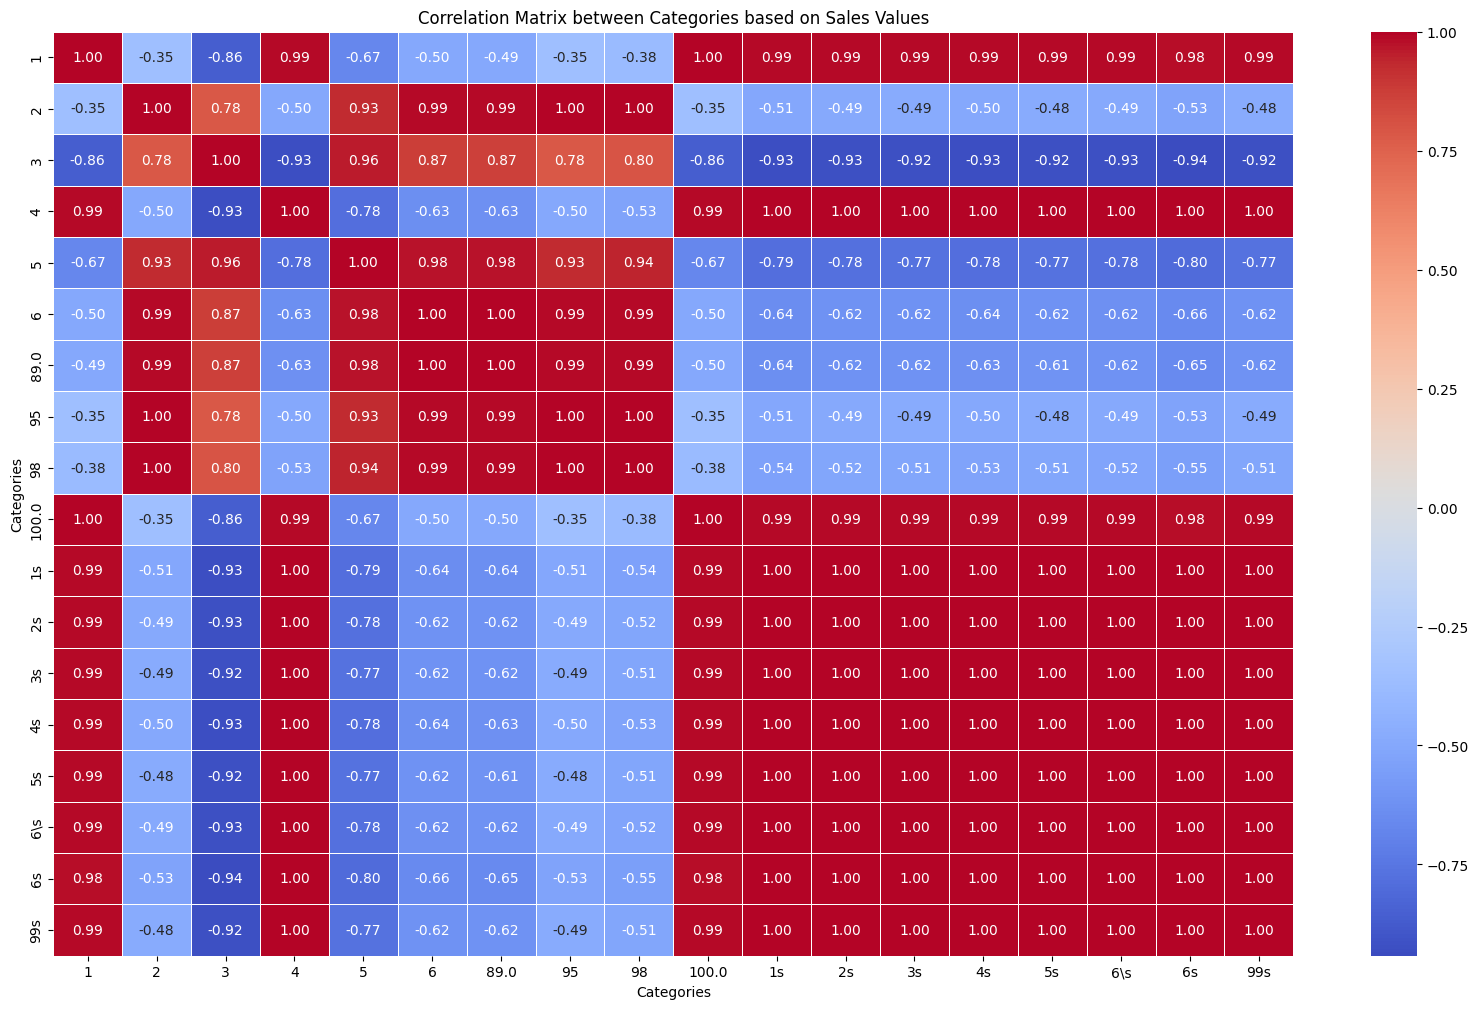

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Categories based on Sales Values')
plt.xlabel('Categories')
plt.ylabel('Categories')
plt.show()

In [54]:
# from this we can determine that category 1 and 4 are closely correlated
# 100 may be mislabelled ---> real label 1
# str categories 1, 2, 3, 4, 5, 6, 6\, 99 mislabelled ---> assume real label 4
#. drop 89, 95, 98 ---> 2, 3, 5, 6 have too high correlation
#. (1, 4), (2, 6), (3, 5) these pairs have very high correlation 

In [55]:
# change category 100 --> 1
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace(100, 1)

In [56]:
# change category 1, 2, 3, 4, 5, 6, 6\, 99 --> 4
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('1', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('2', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('3', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('4', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('5', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('6', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('6\\', 4)
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('99', 4)

/tmp/ipykernel_33/3278712690.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['cluster_catgeory'] = train_df['cluster_catgeory'].replace('99', 4)


In [57]:
train_df = train_df[~train_df['cluster_catgeory'].isin([89, 95, 98])]

In [58]:
train_df = train_df.dropna(subset=['cluster_catgeory'])


In [59]:
train_df['cluster_catgeory'].unique()

array([4., 2., 1., 3., 5., 6.])

In [60]:
train_df = train_df.dropna(subset=['Customer_ID'])

In [61]:
train_df = train_df.dropna(subset=['outlet_city'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


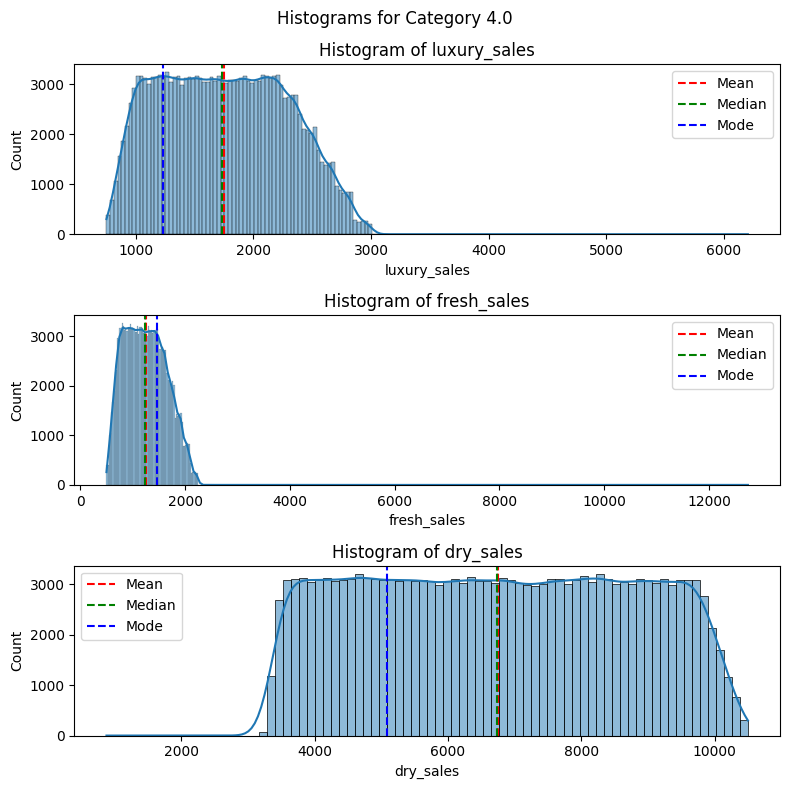

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


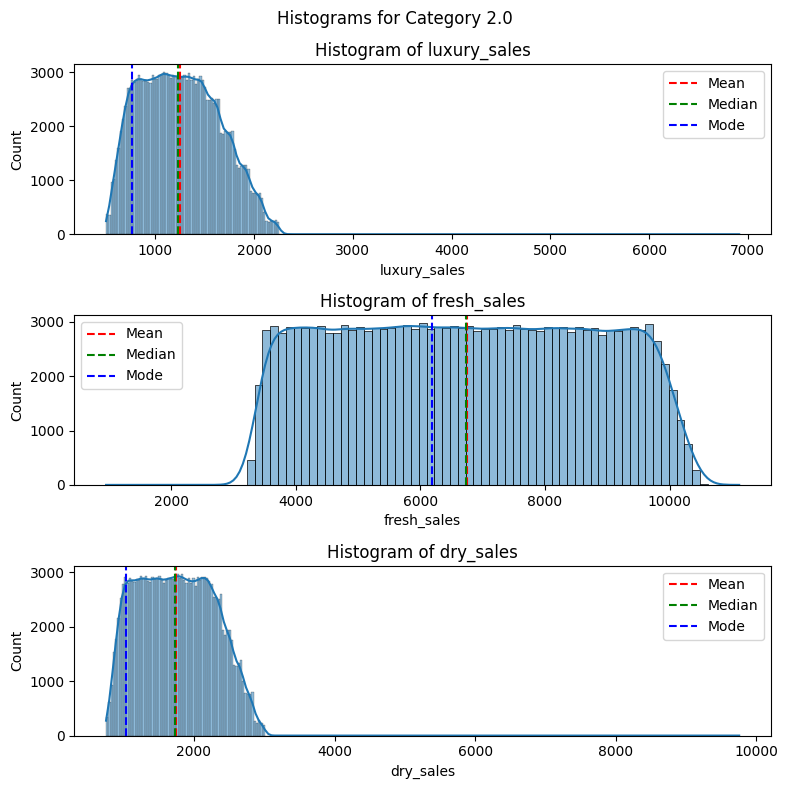

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


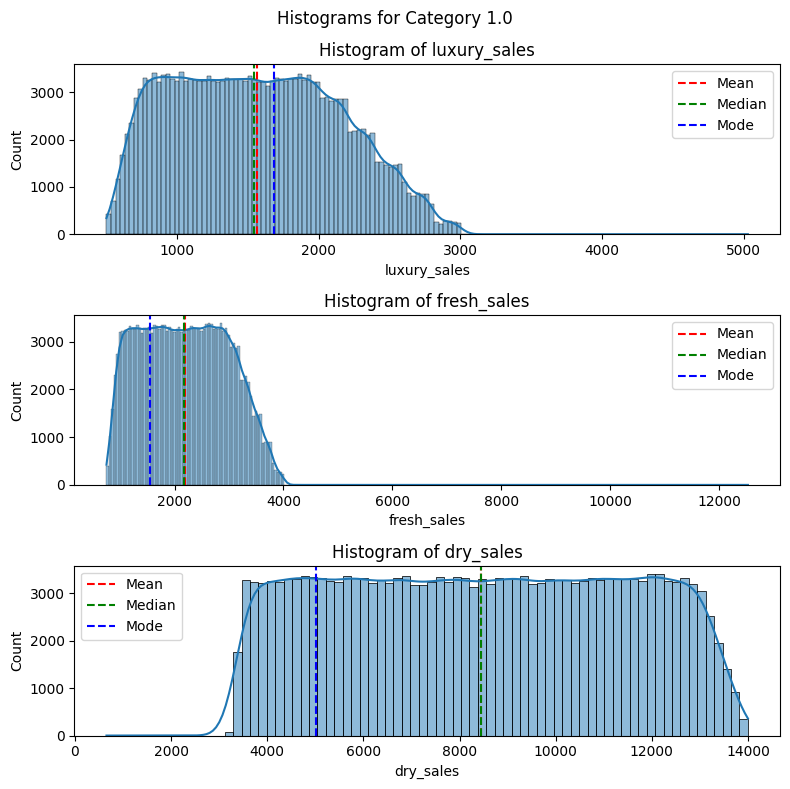

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


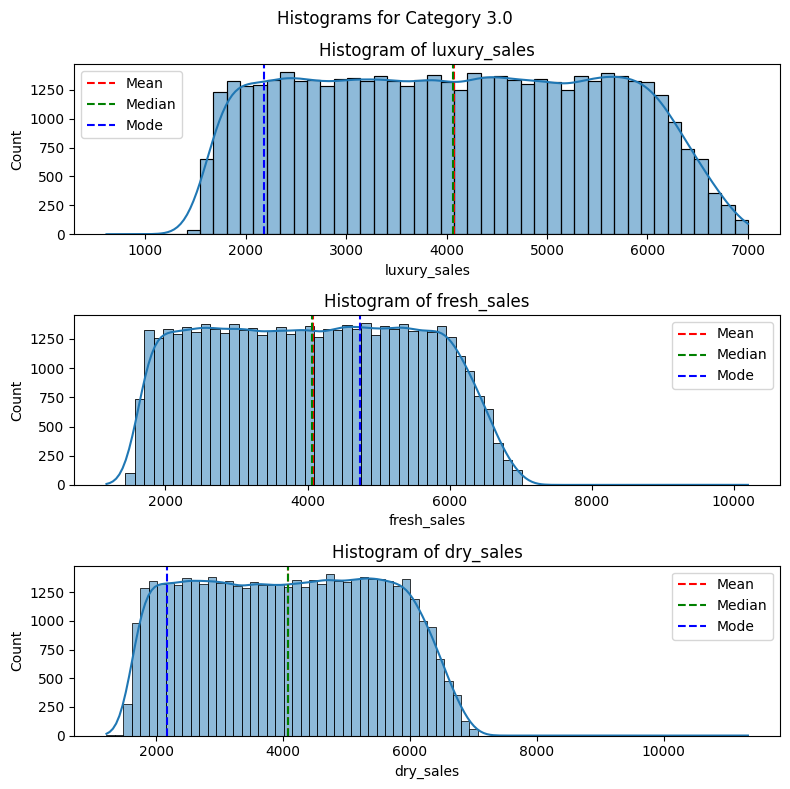

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


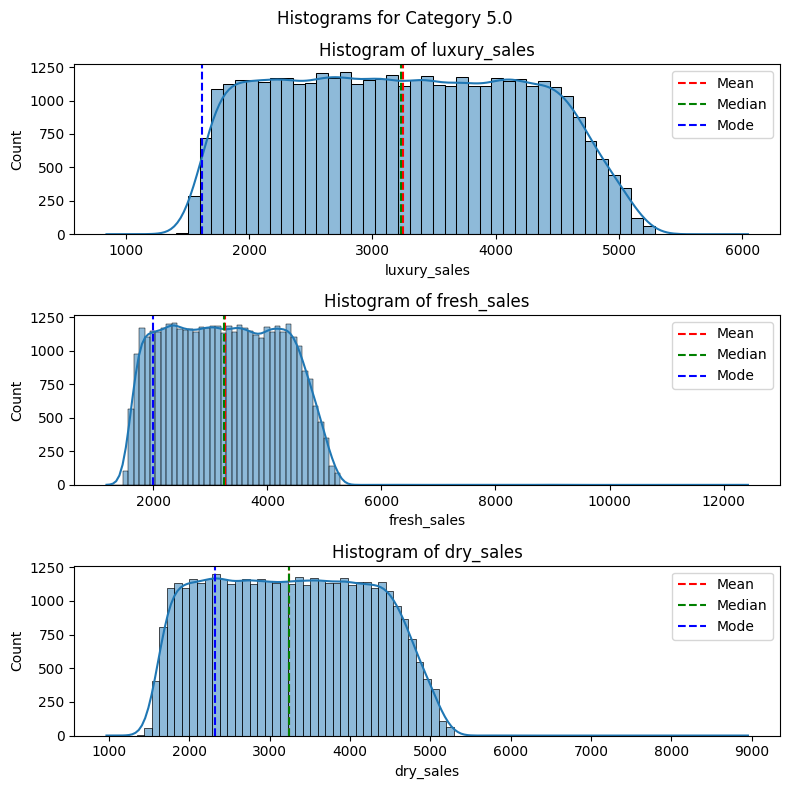

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


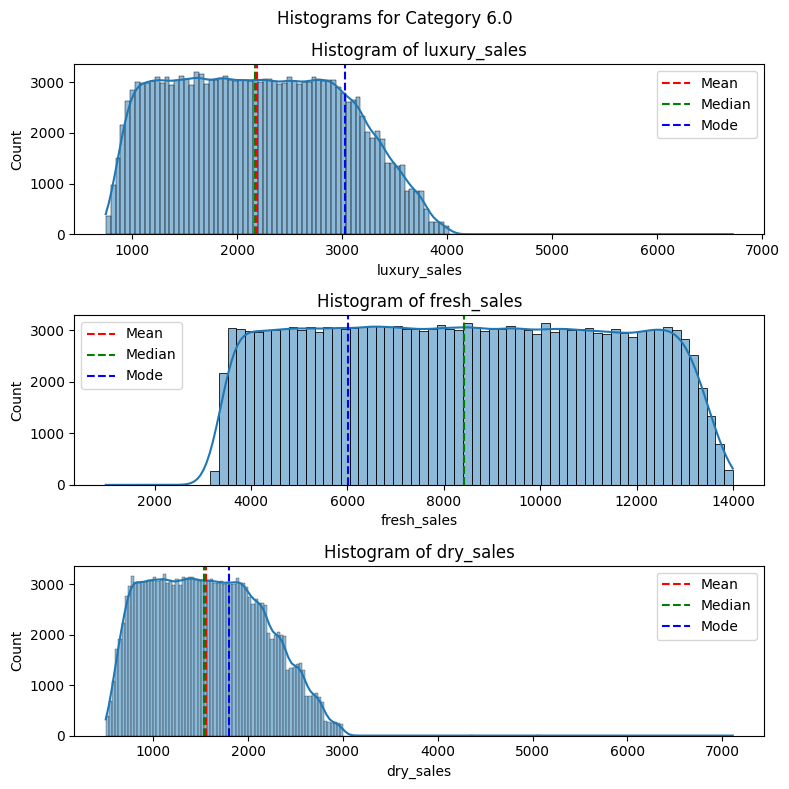

In [62]:
categories = train_df['cluster_catgeory'].unique()

# Plot histograms for each category
for category in categories:
    category_data = train_df[train_df['cluster_catgeory'] == category]
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
    fig.suptitle(f'Histograms for Category {category}')
    for ax, col in zip(axes, ['luxury_sales', 'fresh_sales', 'dry_sales']):
        ax.set_title(f'Histogram of {col}')
        sns.histplot(category_data[col], ax=ax, kde=True)
        ax.axvline(category_data[col].mean(), color='r', linestyle='--', label='Mean')
        ax.axvline(category_data[col].median(), color='g', linestyle='--', label='Median')
        ax.axvline(category_data[col].mode()[0], color='b', linestyle='--', label='Mode')
        ax.legend()
    plt.tight_layout()
    plt.show()

In [63]:
# mean and median same, there fore can use either mean or median
# our dataset is large, hence KNN might also be suitable

# ***Outlet city***

In [64]:
len(train_df['outlet_city'].unique())

20

In [65]:
train_df['outlet_city'].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

In [66]:
 train_df['outlet_city'].map(type).unique()

array([<class 'str'>], dtype=object)

In [67]:
df_copy = train_df.copy()

# Show the modified DataFrame
print("Original DataFrame:")
print(df_copy.head())

Original DataFrame:
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_catgeory  
0               4.0  
1               4.0  
2               4.0  
3               4.0  
4               4.0  


In [68]:
pivot_df = df_copy.pivot_table(index='outlet_city', values=['luxury_sales', 'dry_sales', 'fresh_sales'], aggfunc='sum')

In [69]:
correlation_matrix = pivot_df.transpose().corr()

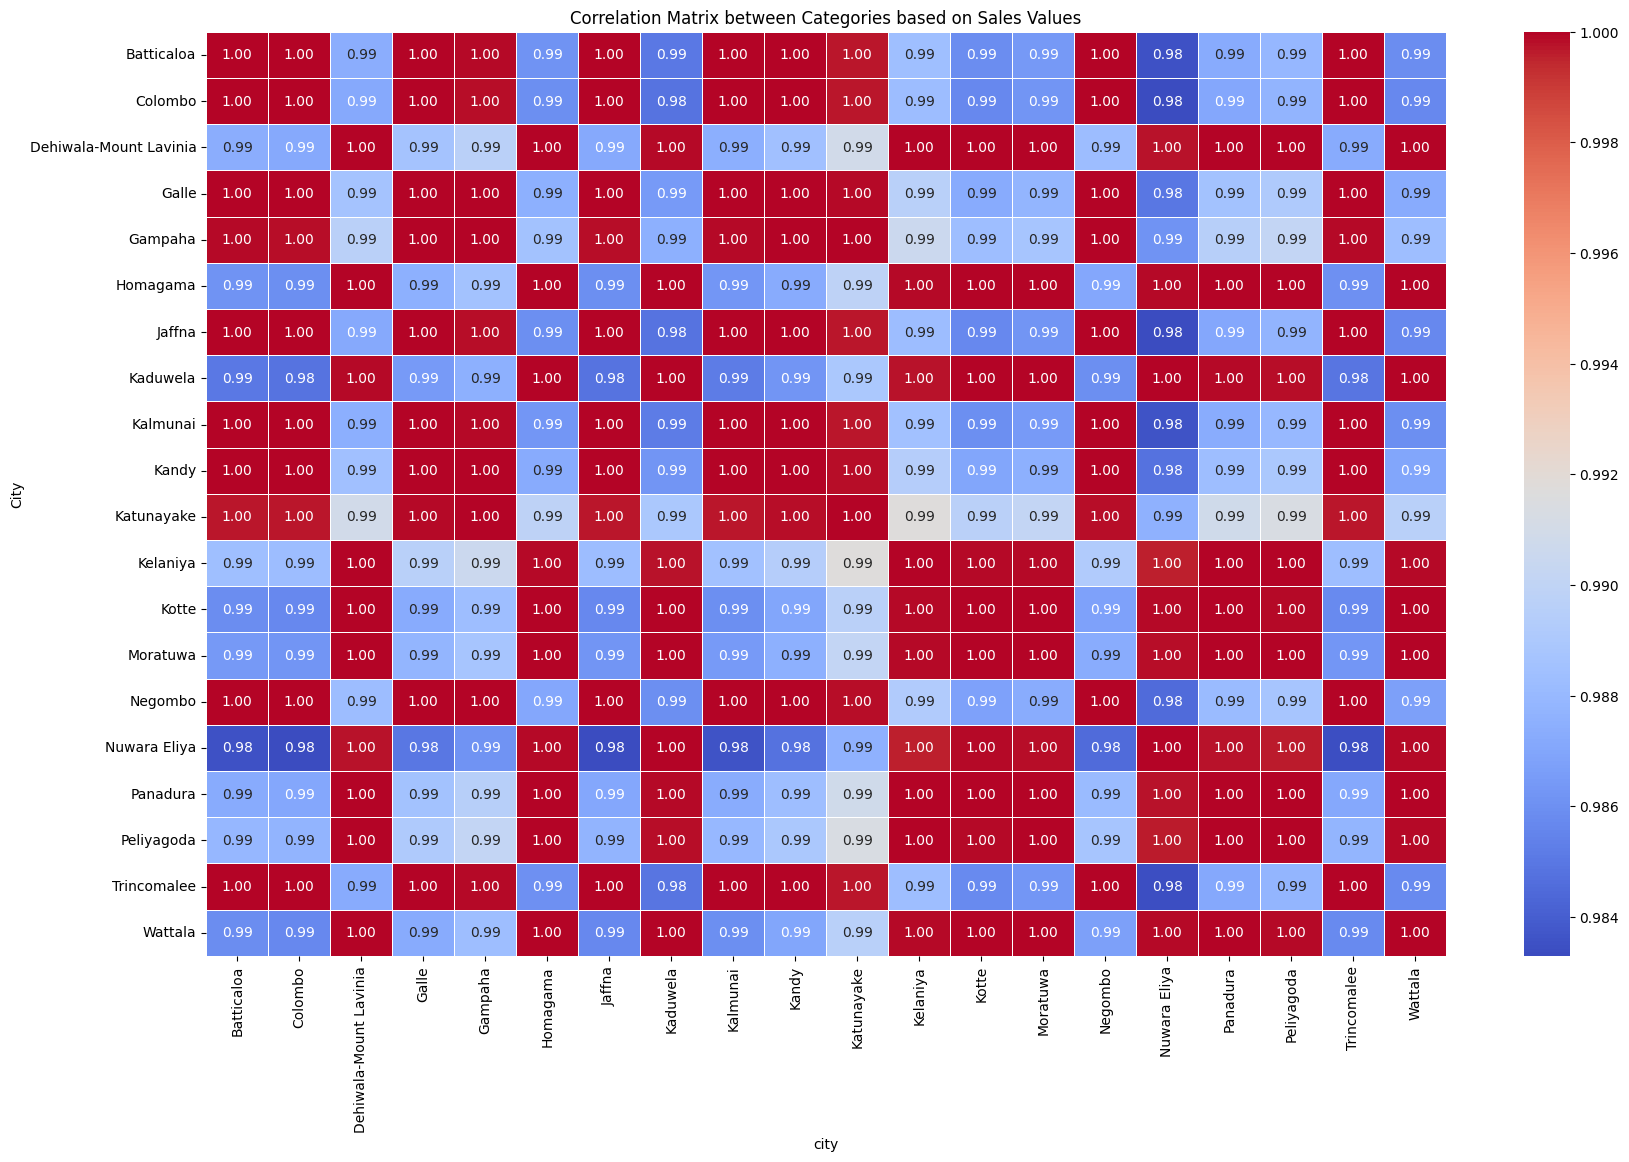

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Categories based on Sales Values')
plt.xlabel('city')
plt.ylabel('City')
plt.show()

In [71]:
# cannot find proper correlation, breakdown city using domain knowledge

In [72]:
city_map = { 1 : ['Negombo','Katunayake'],2:['Dehiwala-Mount Lavinia','Kelaniya','Peliyagoda','Kaduwela','Wattala','Kotte','Homagama','Colombo'],3:['Moratuwa','Panadura'], 4:['Nuwara Eliya'], 5:['Batticaloa','Trincomalee','Kalmunai','Jaffna'],6:['Galle'],7:['Kandy'],8:['Gampaha']}

train_df['cluster_city_enco'] = train_df['outlet_city'].map(lambda city: next((cluster for cluster, cities in city_map.items() if city in cities), None))

train_df['cluster_city_enco'].unique()

array([2, 3, 4, 5, 8, 6, 1, 7])

In [73]:
train_df['luxury_sales'] = train_df['luxury_sales'].astype(float).round(2)
train_df['fresh_sales'] = train_df['fresh_sales'].astype(float).round(2)
train_df['dry_sales'] = train_df['dry_sales'].astype(float).round(2)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774147 entries, 0 to 774154
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_ID        774147 non-null  float64
 1   outlet_city        774147 non-null  object 
 2   luxury_sales       774109 non-null  float64
 3   fresh_sales        774102 non-null  float64
 4   dry_sales          774110 non-null  float64
 5   cluster_catgeory   774147 non-null  float64
 6   cluster_city_enco  774147 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 47.3+ MB


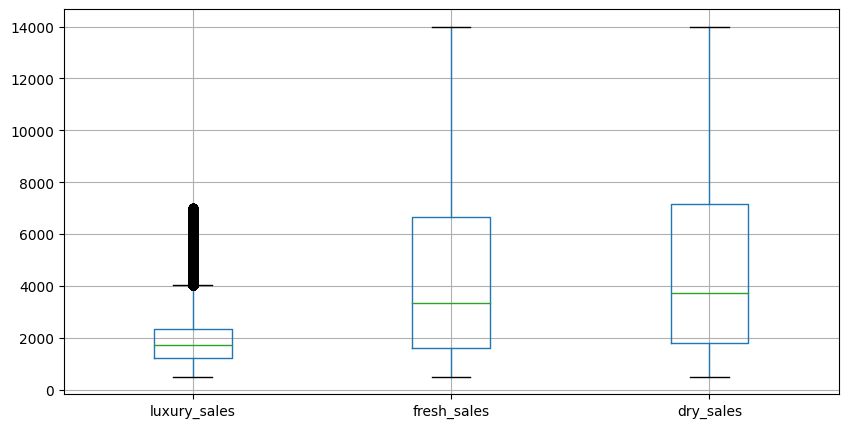

In [74]:
train_df[['luxury_sales','fresh_sales','dry_sales']].boxplot(figsize=(10,5))
plt.show()

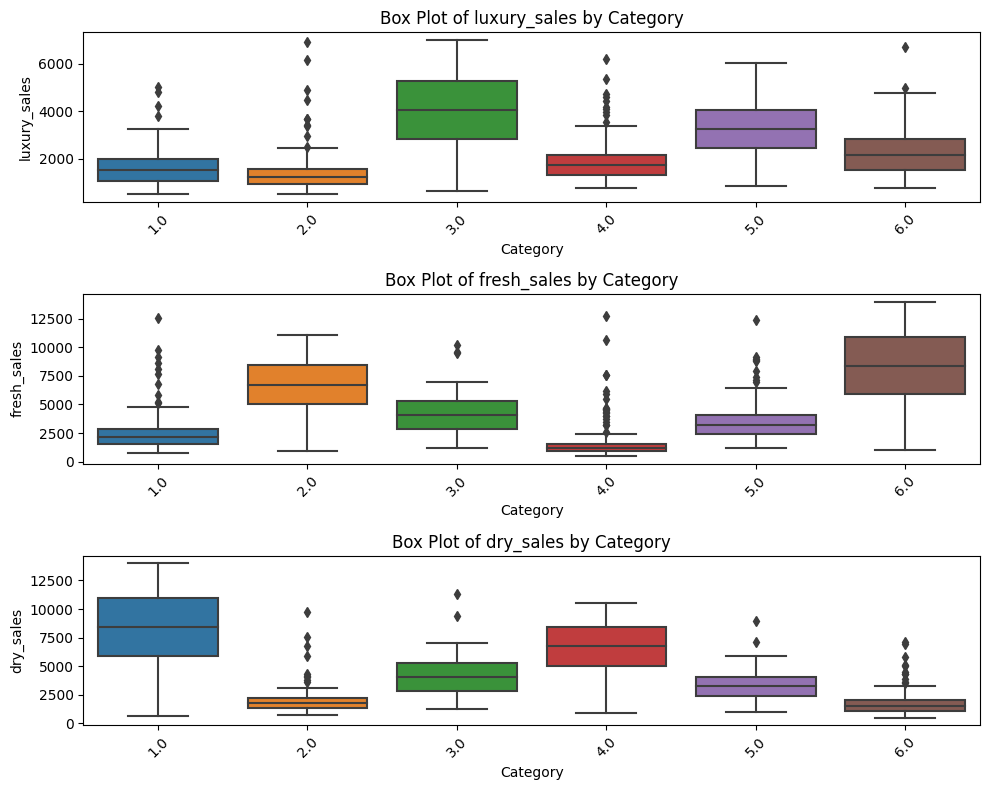

In [75]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Draw box plots for each sales type corresponding to each category
for i, sales_type in enumerate(['luxury_sales', 'fresh_sales', 'dry_sales']):
    sns.boxplot(x='cluster_catgeory', y=sales_type, data=train_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {sales_type} by Category')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(sales_type)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
    
    # Remove outliers
    df = remove_outliers(train_df, sales_type)

plt.tight_layout()
plt.show()

In [76]:
# Display DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
        Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0        10493832.0    Kelaniya       1209.60       756.00    5292.00   
1        10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2        10513916.0     Wattala       2288.88      1481.04    9155.52   
3        10334589.0     Wattala       2274.94      1739.66    9099.76   
4        10458365.0    Kelaniya       2345.49      2069.55    9243.99   
...             ...         ...           ...          ...        ...   
774150   10197979.0     Gampaha       3893.40      3893.40    3448.44   
774151   10494575.0  Katunayake       6095.86      5557.99    6275.15   
774152   10565682.0     Colombo       5121.42      4820.16    4669.53   
774153   10351977.0       Kandy       6311.76      6311.76    5940.48   
774154   10637635.0     Negombo       5833.50      6027.95    6611.30   

        cluster_catgeory  cluster_city_enco  
0                    4.0                  

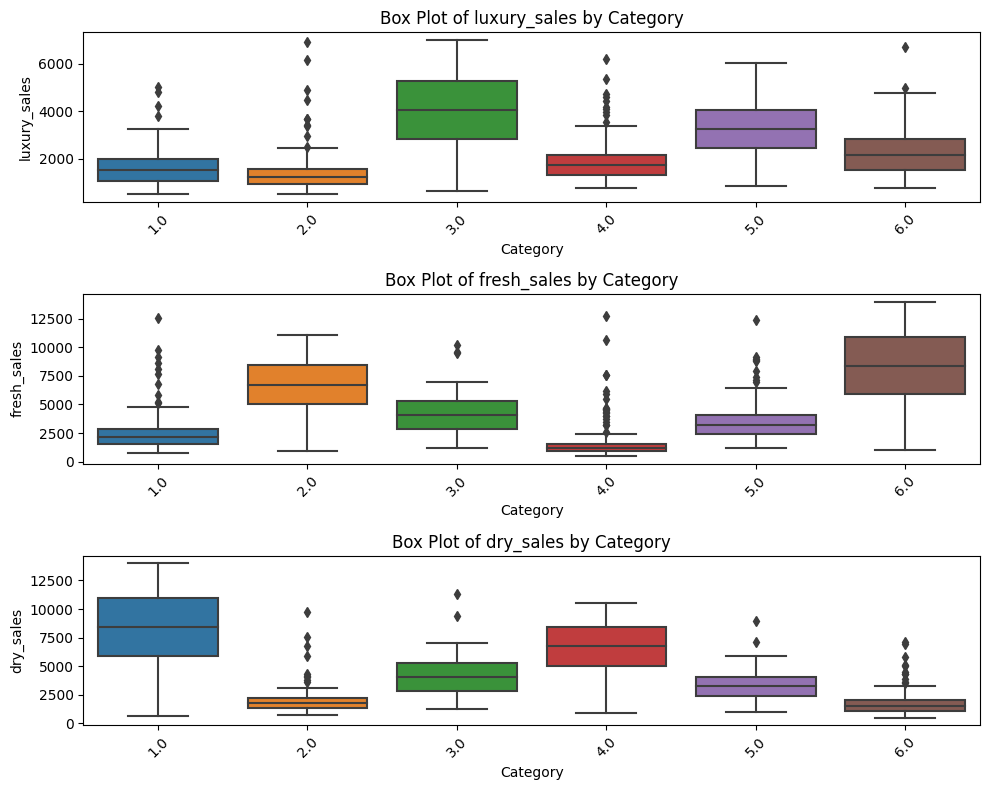

In [77]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Draw box plots for each sales type corresponding to each category
for i, sales_type in enumerate(['luxury_sales', 'fresh_sales', 'dry_sales']):
    sns.boxplot(x='cluster_catgeory', y=sales_type, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {sales_type} by Category')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(sales_type)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
    

plt.tight_layout()
plt.show()

In [78]:
df.shape

(774110, 7)

In [79]:
train_df.shape

(774147, 7)

In [80]:
# get average sales for each cluster category

df_sales_avgs = df.groupby('cluster_catgeory')[['luxury_sales','fresh_sales','dry_sales']].median().round(2)
df_sales_avgs

,luxury_sales,fresh_sales,dry_sales
cluster_catgeory,,,
1.0,1539.24,2173.45,8437.31
2.0,1230.06,6737.52,1736.47
3.0,4062.50,4065.27,4071.70
4.0,1734.34,1229.80,6736.14
5.0,3233.60,3234.66,3235.80
6.0,2166.14,8412.96,1536.04


In [81]:
df['luxury_sales'] = df['luxury_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['luxury_sales']))
df['fresh_sales'] = df['fresh_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['fresh_sales']))
df['dry_sales'] = df['dry_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['dry_sales']))

/tmp/ipykernel_33/1985391668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luxury_sales'] = df['luxury_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['luxury_sales']))
/tmp/ipykernel_33/1985391668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fresh_sales'] = df['fresh_sales'].fillna(df['cluster_catgeory'].map(df_sales_avgs['fresh_sales']))
/tmp/ipykernel_33/1985391668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [82]:
df.isna().sum()

Customer_ID          0
outlet_city          0
luxury_sales         0
fresh_sales          0
dry_sales            0
cluster_catgeory     0
cluster_city_enco    0
dtype: int64

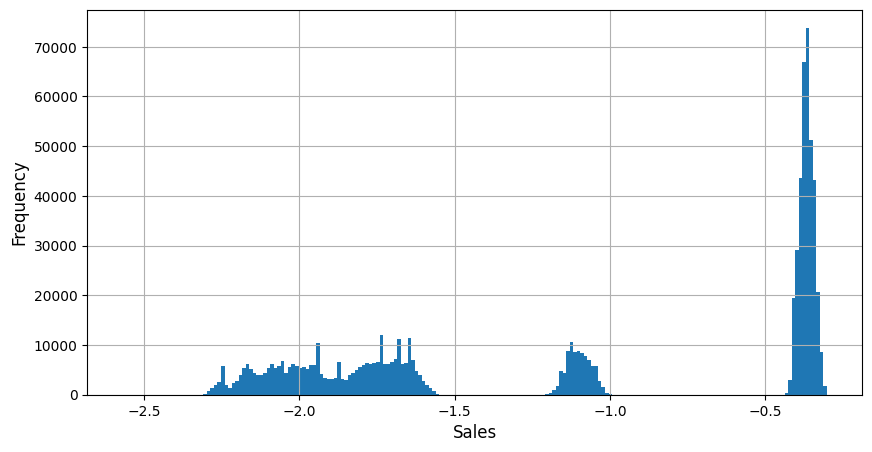

In [104]:
plt.figure(figsize=(10,5))
df['dry_sales_ratio'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

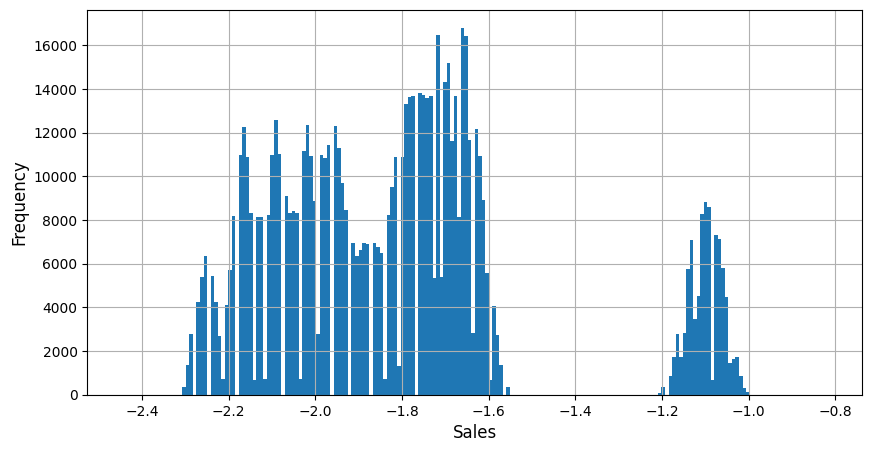

In [105]:
#hist plot
plt.figure(figsize=(10,5))
df['luxury_sales_ratio'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

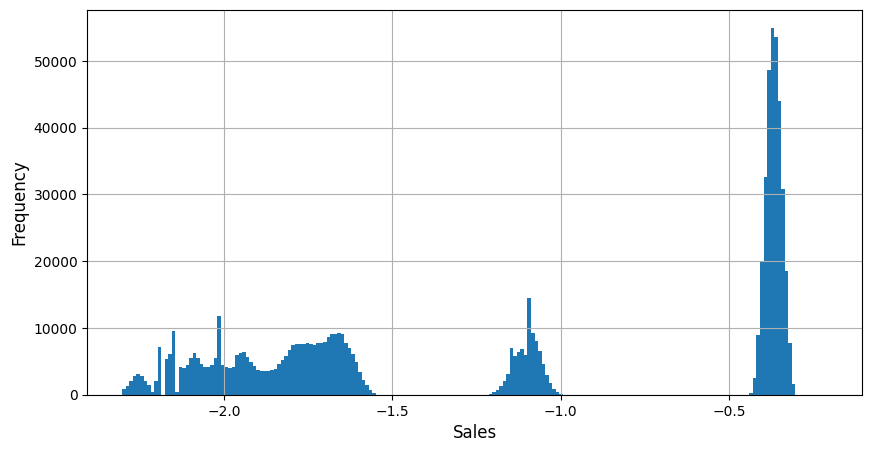

In [107]:
#hist plot
plt.figure(figsize=(10,5))
df['fresh_sales_ratio'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [108]:
#since sales value are skewed take log values
df['fresh_sales_ratio'] = np.log(df['fresh_sales_ratio'])
df['dry_sales_ratio'] = np.log(df['dry_sales_ratio'])
df['luxury_sales_ratio'] = np.log(df['luxury_sales_ratio'])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_33/4213838422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fresh_sales_ratio'] = np.log(df['fresh_sales_ratio'])
/tmp/ipykernel_33/4213838422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dry_sales_ratio'] = np.log(df['dry_sales_ratio'])
/tmp/ipykernel_33/4213838422.py:4: SettingWithCopyWarning: 
A valu

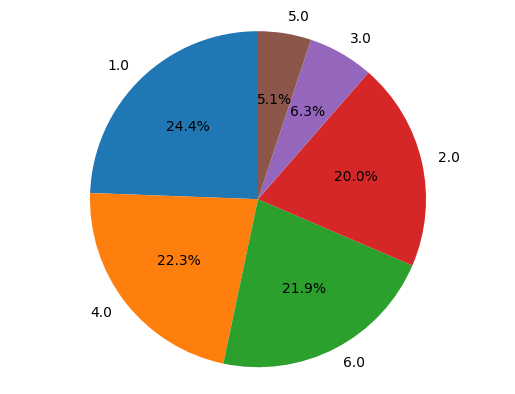

In [109]:
plt.pie(df['cluster_catgeory'].value_counts(), labels=df['cluster_catgeory'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

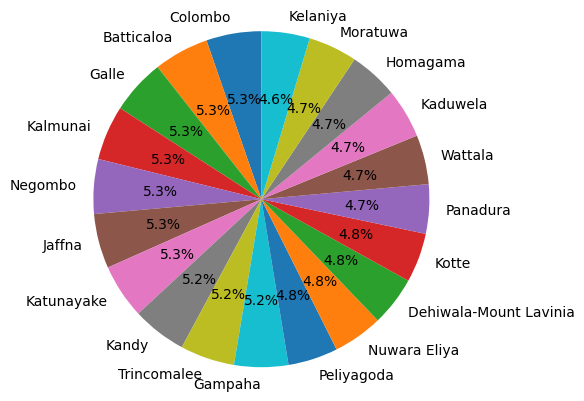

In [110]:
plt.pie(df['outlet_city'].value_counts(), labels=df['outlet_city'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [111]:
df['total_sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']
df['total_sales'].describe().round(2)

/tmp/ipykernel_33/1571239241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']


count    774110.00
mean      11026.95
std        3836.89
min        4509.90
25%        7817.98
50%       10769.22
75%       13733.40
max       20989.50
Name: total_sales, dtype: float64

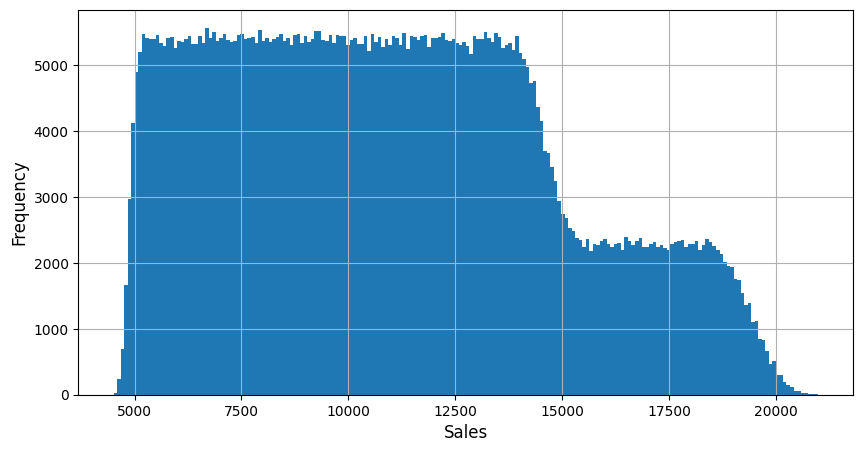

In [112]:
df['total_sales'].hist(bins=200, figsize=(10,5))
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [113]:
df['luxury_sales_ratio'] = (df['luxury_sales'] / df['total_sales']).round(4)  # Round to four decimal places
df['fresh_sales_ratio'] = (df['fresh_sales'] / df['total_sales']).round(4)
df['dry_sales_ratio'] = (df['dry_sales'] / df['total_sales']).round(4)

# Normalize the ratios so that the sum adds up to 1
total_ratio = df['luxury_sales_ratio'] + df['fresh_sales_ratio'] + df['dry_sales_ratio']
df['luxury_sales_ratio'] /= total_ratio
df['fresh_sales_ratio'] /= total_ratio
df['dry_sales_ratio'] /= total_ratio

/tmp/ipykernel_33/1585816607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luxury_sales_ratio'] = (df['luxury_sales'] / df['total_sales']).round(4)  # Round to four decimal places
/tmp/ipykernel_33/1585816607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fresh_sales_ratio'] = (df['fresh_sales'] / df['total_sales']).round(4)
/tmp/ipykernel_33/1585816607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [114]:
df['luxury_sales_ratio'] = df['luxury_sales_ratio'].round(4)  # Round to four decimal places
df['fresh_sales_ratio'] = df['fresh_sales_ratio'].round(4)
df['dry_sales_ratio'] = df['dry_sales_ratio'].round(4)

/tmp/ipykernel_33/691924936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luxury_sales_ratio'] = df['luxury_sales_ratio'].round(4)  # Round to four decimal places
/tmp/ipykernel_33/691924936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fresh_sales_ratio'] = df['fresh_sales_ratio'].round(4)
/tmp/ipykernel_33/691924936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [115]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,cluster_city_enco,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,encoded_col
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,2,7257.60,0.1667,0.1042,0.7291,0
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,4.0,3,8657.32,0.1837,0.1224,0.6939,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,2,12925.44,0.1771,0.1146,0.7083,2
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,2,13114.36,0.1735,0.1327,0.6938,2
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,2,13659.03,0.1717,0.1515,0.6768,0


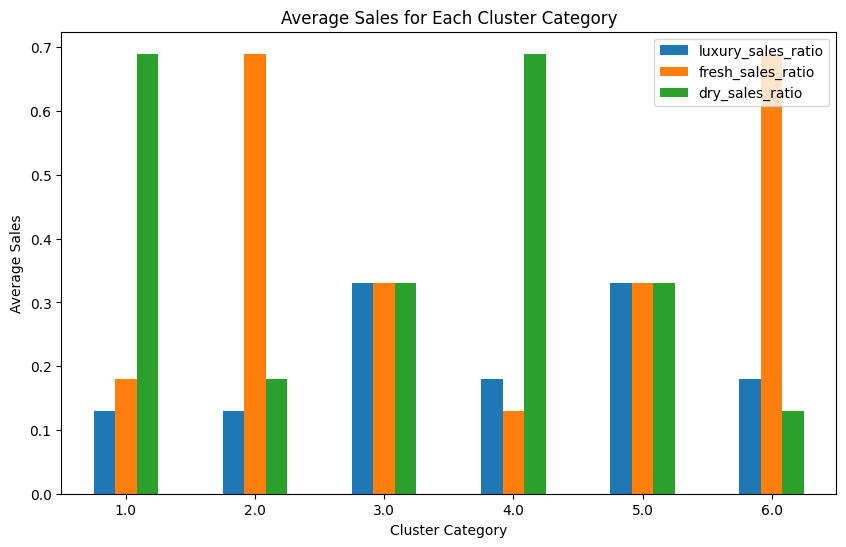

In [119]:
df_sales_avgs_1 = df.groupby('cluster_catgeory')[['luxury_sales_ratio','fresh_sales_ratio','dry_sales_ratio']].mean().round(2)

df_sales_avgs_1.plot(kind='bar', figsize=(10,6))
plt.title('Average Sales for Each Cluster Category')
plt.ylabel('Average Sales')
plt.xlabel('Cluster Category')
plt.xticks(rotation=0)
plt.show()

In [120]:
# Replace string values with integer codes
df['encoded_col'] = pd.factorize(df['outlet_city'])[0]

/tmp/ipykernel_33/976396163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_col'] = pd.factorize(df['outlet_city'])[0]


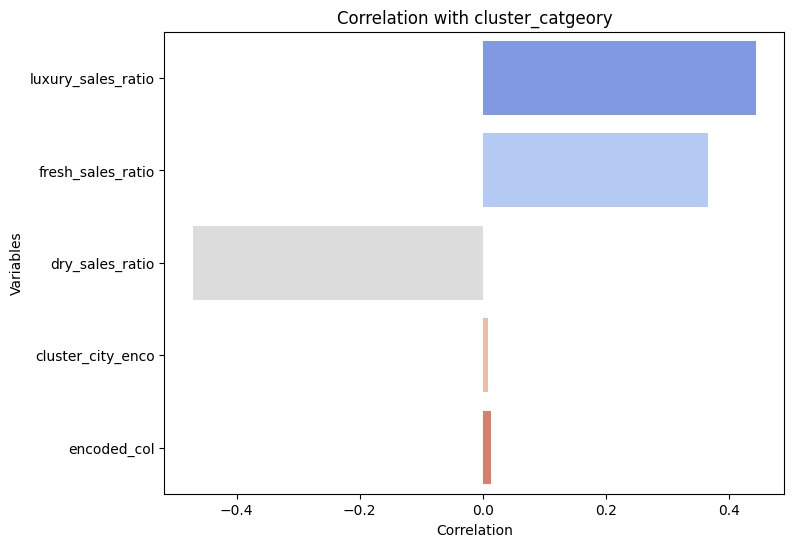

In [121]:
import seaborn as sns

# Calculate correlation matrix including specific columns
correlation_with_target = df[['luxury_sales_ratio', 'fresh_sales_ratio', 'dry_sales_ratio','cluster_city_enco', 'encoded_col']].corrwith(df['cluster_catgeory'])

# Plot correlation barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation with cluster_catgeory')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()

In [129]:
# city has no/ negligible correlation to category

In [ ]:
columns_to_drop = ['luxury_sales', 'fresh_sales', 'total_sales', 'dry_sales']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping specified columns:")
print(df.head())

In [136]:
df.to_csv("cleaned.csv")

In [137]:
df = pd.read_csv('/kaggle/working/cleaned.csv')

In [138]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Customer_ID,outlet_city,cluster_catgeory,cluster_city_enco,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,encoded_col
0,0,0,10493832.0,Kelaniya,4.0,2,0.1667,0.1042,0.7291,0
1,1,1,10178643.0,Moratuwa,4.0,3,0.1837,0.1224,0.6939,1
2,2,2,10513916.0,Wattala,4.0,2,0.1771,0.1146,0.7083,2
3,3,3,10334589.0,Wattala,4.0,2,0.1735,0.1327,0.6938,2
4,4,4,10458365.0,Kelaniya,4.0,2,0.1717,0.1515,0.6768,0


In [139]:
len(df['outlet_city'].unique())

20

In [140]:
df['city_encoded'], encoded_map = pd.factorize(df['outlet_city'])

print("DataFrame with city names encoded to integer values:")
print(len(df['city_encoded'].unique()))

DataFrame with city names encoded to integer values:
20


In [141]:
df = df.drop(columns=['outlet_city'])

In [142]:
df = df.drop(df.columns[0], axis=1)

In [143]:
df.head()

,Unnamed: 0,Customer_ID,cluster_catgeory,cluster_city_enco,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,encoded_col,city_encoded
0,0,10493832.0,4.0,2,0.1667,0.1042,0.7291,0,0
1,1,10178643.0,4.0,3,0.1837,0.1224,0.6939,1,1
2,2,10513916.0,4.0,2,0.1771,0.1146,0.7083,2,2
3,3,10334589.0,4.0,2,0.1735,0.1327,0.6938,2,2
4,4,10458365.0,4.0,2,0.1717,0.1515,0.6768,0,0


In [144]:
col1 = train_df[train_df['cluster_catgeory'] == 1.]

In [145]:
col2 = train_df[train_df['cluster_catgeory'] == 4.]

In [146]:
col3 = train_df[train_df['cluster_catgeory'] == 2.]

In [147]:
col4 = train_df[train_df['cluster_catgeory'] == 6.]

In [148]:
col5 = train_df[train_df['cluster_catgeory'] == 3.]

In [149]:
col6 = train_df[train_df['cluster_catgeory'] == 5.]

In [150]:
unique_col1 = set(col1['outlet_city'].unique())
unique_col2 = set(col2['outlet_city'].unique())

# Find values that do not intersect
unique_to_col1 = unique_col1 - unique_col2
unique_to_col2 = unique_col2 - unique_col1

unique_col3 = set(col3['outlet_city'].unique())
unique_col4 = set(col4['outlet_city'].unique())

# Find values that do not intersect
unique_to_col3 = unique_col3 - unique_col4
unique_to_col4 = unique_col4 - unique_col3

unique_col5 = set(col5['outlet_city'].unique())
unique_col6 = set(col6['outlet_city'].unique())

# Find values that do not intersect
unique_to_col5 = unique_col5 - unique_col6
unique_to_col6 = unique_col6 - unique_col5

In [151]:
unique_to_col1

{'Batticaloa', 'Gampaha', 'Katunayake', 'Negombo'}

In [152]:
unique_to_col2

{'Dehiwala-Mount Lavinia',
 'Homagama',
 'Kotte',
 'Nuwara Eliya',
 'Panadura',
 'Peliyagoda'}

In [153]:
unique_to_col3

{'Homagama', 'Moratuwa', 'Peliyagoda'}

In [154]:
unique_to_col4

{'Colombo', 'Kandy', 'Trincomalee'}

In [155]:
unique_to_col5

{'Kandy'}

In [156]:
unique_to_col6

{'Dehiwala-Mount Lavinia', 'Homagama', 'Kelaniya', 'Moratuwa'}

In [157]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

In [158]:
# Define a dictionary to map categories to sub-groups
category_to_subgroup = {1: 1, 4: 1, 2: 2, 6: 2, 3: 3, 5: 3}

# Map categories to sub-groups and create the 'sub_group' column
df['sub_group'] = df['cluster_catgeory'].map(category_to_subgroup)

print("DataFrame with 'sub_group' column:")
print(df)

DataFrame with 'sub_group' column:
        Unnamed: 0  Customer_ID  cluster_catgeory  cluster_city_enco  \
0                0   10493832.0                 4                  2   
1                1   10178643.0                 4                  3   
2                2   10513916.0                 4                  2   
3                3   10334589.0                 4                  2   
4                4   10458365.0                 4                  2   
...            ...          ...               ...                ...   
774105      774150   10197979.0                 3                  8   
774106      774151   10494575.0                 3                  1   
774107      774152   10565682.0                 3                  2   
774108      774153   10351977.0                 3                  7   
774109      774154   10637635.0                 3                  1   

        luxury_sales_ratio  fresh_sales_ratio  dry_sales_ratio  encoded_col  \
0                   0

In [167]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [168]:
df_copy = df.copy()

In [169]:
df = df.drop(columns=['cluster_city_enco'])

In [170]:
df.head()

,Unnamed: 0,Customer_ID,cluster_catgeory,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,encoded_col,city_encoded,sub_group
0,0,10493832.0,4,0.1667,0.1042,0.7291,0,0,1
1,1,10178643.0,4,0.1837,0.1224,0.6939,1,1,1
2,2,10513916.0,4,0.1771,0.1146,0.7083,2,2,1
3,3,10334589.0,4,0.1735,0.1327,0.6938,2,2,1
4,4,10458365.0,4,0.1717,0.1515,0.6768,0,0,1


In [171]:
len(df['city_encoded'].unique())

20

In [172]:
dataset_copy = df.copy()

In [173]:
df = df.drop(columns=['encoded_col'])

In [174]:
df.head()

,Unnamed: 0,Customer_ID,cluster_catgeory,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,city_encoded,sub_group
0,0,10493832.0,4,0.1667,0.1042,0.7291,0,1
1,1,10178643.0,4,0.1837,0.1224,0.6939,1,1
2,2,10513916.0,4,0.1771,0.1146,0.7083,2,1
3,3,10334589.0,4,0.1735,0.1327,0.6938,2,1
4,4,10458365.0,4,0.1717,0.1515,0.6768,0,1


In [175]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['cluster_catgeory', 'Customer_ID'])
y = df['cluster_catgeory']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the resampling strategy using a pipeline
resampling_strategy = Pipeline([
    ('oversampling', SMOTE(random_state=42)),  # Oversampling using SMOTE
    ('undersampling', RandomUnderSampler(random_state=42))  # Undersampling using RandomUnderSampler
])

# Apply the resampling strategy to the training data only
X_train_resampled, y_train_resampled = resampling_strategy.fit_resample(X_train, y_train)

In [176]:
X_train_resampled

,Unnamed: 0,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,city_encoded,sub_group
2,473966,0.132700,0.173500,0.693800,19,1
5,434837,0.118300,0.172000,0.709700,10,1
6,402013,0.103100,0.185600,0.711300,13,1
9,503514,0.130000,0.180000,0.690000,17,1
12,401586,0.151500,0.171700,0.676800,10,1
...,...,...,...,...,...,...
892792,571960,0.185532,0.685866,0.128602,11,2
70401,619513,0.191500,0.702100,0.106400,12,2
545986,683539,0.171700,0.686900,0.141400,18,2
575627,690574,0.196100,0.656800,0.147100,14,2


In [177]:
X_train_resampled.shape

(906984, 6)

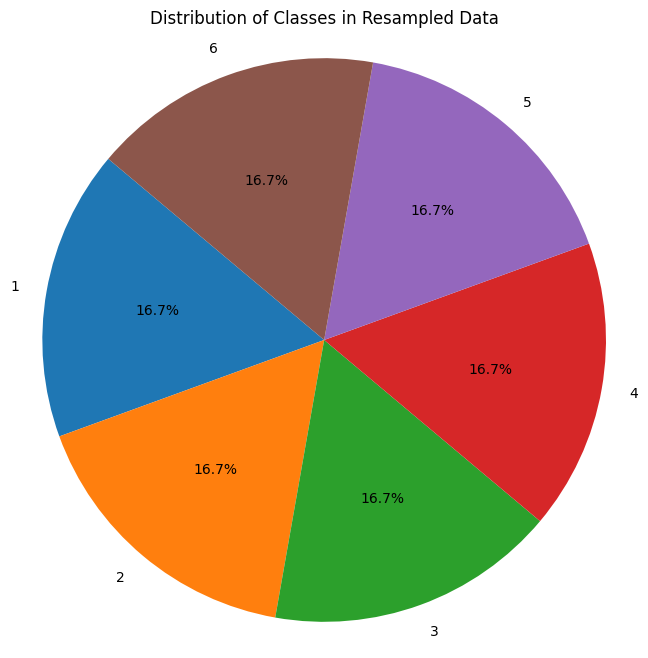

In [178]:
class_counts = y_train_resampled.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in Resampled Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [179]:
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['cluster_catgeory'])

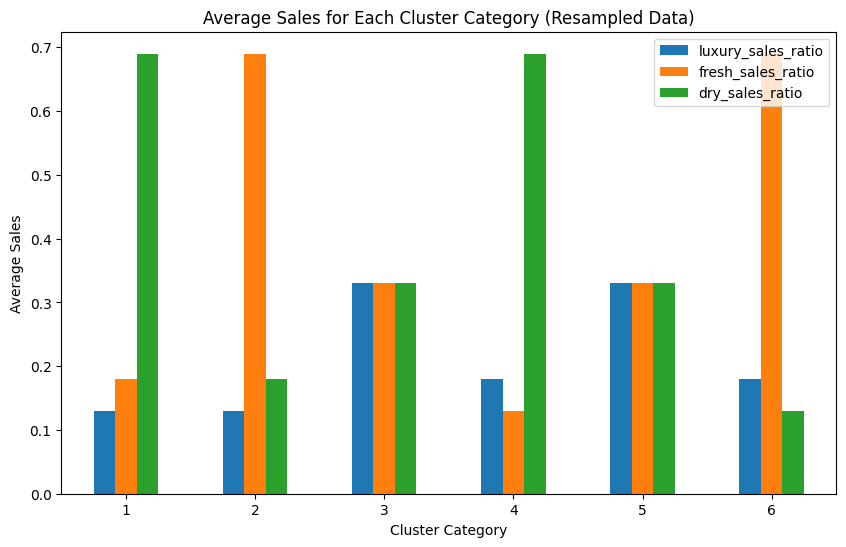

In [180]:
# Assuming df_sales_avgs_resampled is your DataFrame containing average sales for each cluster category from the resampled data

df_sales_avgs_resampled = X_train_resampled.join(y_train_resampled_df).groupby('cluster_catgeory')[['luxury_sales_ratio','fresh_sales_ratio','dry_sales_ratio']].mean().round(2)

df_sales_avgs_resampled.plot(kind='bar', figsize=(10,6))
plt.title('Average Sales for Each Cluster Category (Resampled Data)')
plt.ylabel('Average Sales')
plt.xlabel('Cluster Category')
plt.xticks(rotation=0)
plt.show()

In [181]:
dataset_copy.head()

,Unnamed: 0,Customer_ID,cluster_catgeory,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,encoded_col,city_encoded,sub_group
0,0,10493832.0,4,0.1667,0.1042,0.7291,0,0,1
1,1,10178643.0,4,0.1837,0.1224,0.6939,1,1,1
2,2,10513916.0,4,0.1771,0.1146,0.7083,2,2,1
3,3,10334589.0,4,0.1735,0.1327,0.6938,2,2,1
4,4,10458365.0,4,0.1717,0.1515,0.6768,0,0,1


In [182]:
temp_df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [183]:
temp_df.head()

,Unnamed: 0,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,city_encoded,sub_group,cluster_catgeory
2,473966,0.1327,0.1735,0.6938,19,1,1
5,434837,0.1183,0.1720,0.7097,10,1,1
6,402013,0.1031,0.1856,0.7113,13,1,1
9,503514,0.1300,0.1800,0.6900,17,1,1
12,401586,0.1515,0.1717,0.6768,10,1,1


In [184]:
col1 = temp_df[temp_df['cluster_catgeory'] == 1]
col2 = temp_df[temp_df['cluster_catgeory'] == 4]
col3 = temp_df[temp_df['cluster_catgeory'] == 2]
col4 = temp_df[temp_df['cluster_catgeory'] == 6]
col5 = temp_df[temp_df['cluster_catgeory'] == 3]
col6 = temp_df[temp_df['cluster_catgeory'] == 5]

In [185]:
unique_col1_new = set(col1['city_encoded'].unique())
unique_col2_new = set(col2['city_encoded'].unique())

# Find values that do not intersect
unique_to_col1_new = unique_col1_new - unique_col2_new
unique_to_col2_new = unique_col2_new - unique_col1_new

unique_col3_new = set(col3['city_encoded'].unique())
unique_col4_new = set(col4['city_encoded'].unique())

# Find values that do not intersect
unique_to_col3_new = unique_col3_new - unique_col4_new
unique_to_col4_new = unique_col4_new - unique_col3_new

unique_col5_new = set(col5['city_encoded'].unique())
unique_col6_new = set(col6['city_encoded'].unique())

# Find values that do not intersect
unique_to_col5_new = unique_col5_new - unique_col6_new
unique_to_col6_new = unique_col6_new - unique_col5_new

In [186]:
def get_cities(encode_map, index):
    x = []
    for i in index:
        x.append(encode_map[i])
    return x

In [187]:
# Define a dictionary to map categories to sub-groups
category_to_subgroup = {1: 1, 4: 1, 2: 2, 6: 2, 3: 3, 5: 3}

# Map categories to sub-groups and create the 'sub_group' column
df['sub_group'] = df['cluster_catgeory'].map(category_to_subgroup)

print("DataFrame with 'sub_group' column:")
print(df)

DataFrame with 'sub_group' column:
        Unnamed: 0  Customer_ID  cluster_catgeory  luxury_sales_ratio  \
0                0   10493832.0                 4              0.1667   
1                1   10178643.0                 4              0.1837   
2                2   10513916.0                 4              0.1771   
3                3   10334589.0                 4              0.1735   
4                4   10458365.0                 4              0.1717   
...            ...          ...               ...                 ...   
774105      774150   10197979.0                 3              0.3465   
774106      774151   10494575.0                 3              0.3400   
774107      774152   10565682.0                 3              0.3505   
774108      774153   10351977.0                 3              0.3400   
774109      774154   10637635.0                 3              0.3158   

        fresh_sales_ratio  dry_sales_ratio  city_encoded  sub_group  
0                 

In [188]:
df.head()

,Unnamed: 0,Customer_ID,cluster_catgeory,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,city_encoded,sub_group
0,0,10493832.0,4,0.1667,0.1042,0.7291,0,1
1,1,10178643.0,4,0.1837,0.1224,0.6939,1,1
2,2,10513916.0,4,0.1771,0.1146,0.7083,2,1
3,3,10334589.0,4,0.1735,0.1327,0.6938,2,1
4,4,10458365.0,4,0.1717,0.1515,0.6768,0,1


In [189]:
temp_df = temp_df.reset_index()

In [190]:
df.to_csv("training.csv")

In [191]:
luxury_sales = temp_df['luxury_sales_ratio']
fresh_sales = temp_df['fresh_sales_ratio']
dry_sales = temp_df['dry_sales_ratio']
city = temp_df['city_encoded']
cat = temp_df['cluster_catgeory']

In [192]:
X = np.column_stack((luxury_sales, fresh_sales, dry_sales, city))

In [193]:
from sklearn.cluster import KMeans
import numpy as np


# Perform K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


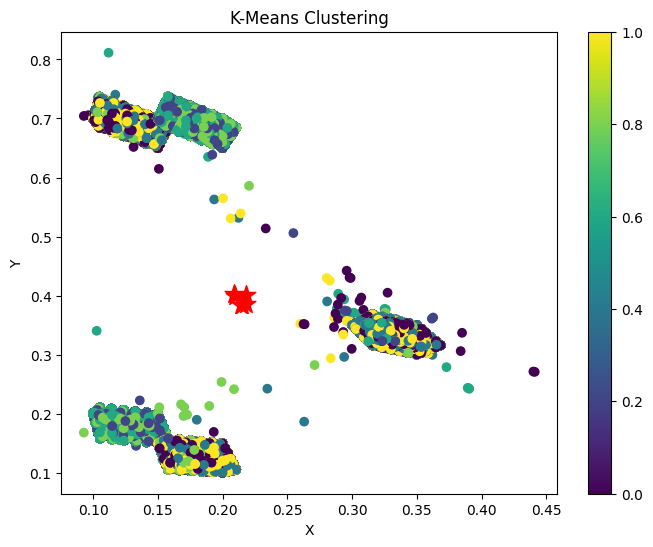

In [194]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='*', s=200)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [195]:
# the city category makes it impossible for classification

In [196]:
X = np.column_stack((luxury_sales, fresh_sales, dry_sales))

In [197]:
from sklearn.cluster import KMeans
import numpy as np


# Perform K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


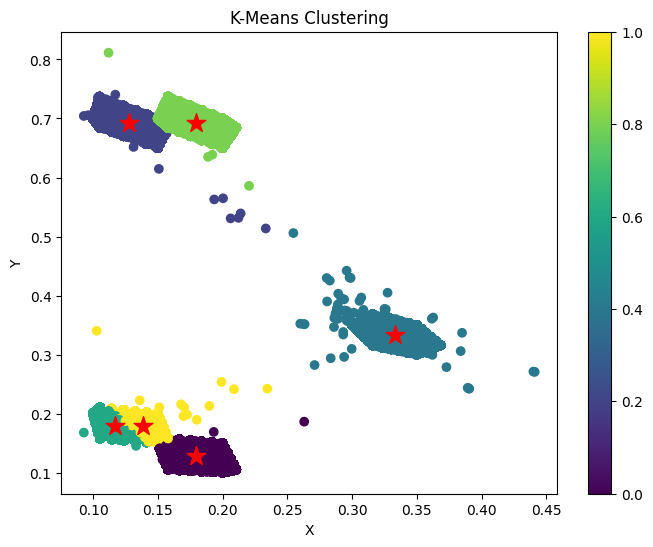

In [198]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='*', s=200)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [199]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming X is your dataset with features
X = np.column_stack((luxury_sales, fresh_sales, dry_sales))
# Assuming y is your target variable
y = cat

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Calculate the distance of each point from its nearest cluster centroid
distances = np.square(X - centroids[labels]).sum(axis=1)

# Set a distance threshold (e.g., 95th percentile)
distance_threshold = np.percentile(distances, 95)

# Identify outliers
outliers_mask = distances > distance_threshold
inliers_mask = ~outliers_mask

# Count of outliers and inliers for each feature
outliers_count = outliers_mask.sum(axis=0)
inliers_count = inliers_mask.sum(axis=0)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [200]:
inliers_count

861968

In [201]:
# Create a pandas DataFrame with the cleaned data
cleaned_data = np.column_stack((luxury_sales[inliers_mask], fresh_sales[inliers_mask], dry_sales[inliers_mask], y[inliers_mask]))
cleaned_df = pd.DataFrame(cleaned_data, columns=['luxury_sales', 'fresh_sales', 'dry_sales', 'category'])

In [202]:
cleaned_df.head()

,luxury_sales,fresh_sales,dry_sales,category
0,0.1327,0.1735,0.6938,1.0
1,0.1183,0.1720,0.7097,1.0
2,0.1300,0.1800,0.6900,1.0
3,0.1515,0.1717,0.6768,1.0
4,0.1354,0.1562,0.7084,1.0


In [203]:
cleaned_df['category'] = cleaned_df['category'].astype(int)

In [204]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [205]:
cleaned_df.to_csv('final_cleaned.csv')

In [206]:
kfold = StratifiedKFold(n_splits=10)

In [207]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [208]:
X_train = cleaned_df.drop(columns=['category'])
Y_train = cleaned_df['category']

In [209]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [210]:
skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)


param_grid = {'max_depth': range(0,5), 
              'n_estimators': range(0, 5), 
              'max_features': [1.0], 
              'random_state': [42], 
              'warm_start': [True]}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1, cv=skf, verbose=1).fit(X_train, Y_train)

print('CV Score: {}'.format(grid.best_score_))

NameError: name 'RepeatedStratifiedKFold' is not defined

In [211]:
labels = pd.Series([1, 2, 3, 4, 5, 6])

# Mapping old labels to new labels
label_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}

# Replace old labels with new labels
new_labels = labels.replace(label_mapping)
print(new_labels)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64


In [212]:
Y_train_mod = Y_train.replace(label_mapping)

In [213]:
y_test_mod = y_test.replace(label_mapping)

In [214]:
Y_train

0         1
1         1
2         1
3         1
4         1
         ..
861963    6
861964    6
861965    6
861966    6
861967    6
Name: category, Length: 861968, dtype: int64

In [215]:
X_train

,luxury_sales,fresh_sales,dry_sales
0,0.132700,0.173500,0.693800
1,0.118300,0.172000,0.709700
2,0.130000,0.180000,0.690000
3,0.151500,0.171700,0.676800
4,0.135400,0.156200,0.708400
...,...,...,...
861963,0.172000,0.720500,0.107500
861964,0.185532,0.685866,0.128602
861965,0.191500,0.702100,0.106400
861966,0.171700,0.686900,0.141400


In [220]:
print('Test score:', grid.score(X_test, y_test))
print('Best params:\n{}'.format(grid.best_params_))

NameError: name 'grid' is not defined

In [221]:
print(train_data.feature_name)

NameError: name 'train_data' is not defined

In [222]:
X_test.head()

,Unnamed: 0,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,sub_group
731491,731530,0.3299,0.3196,0.3505,3
226844,226851,0.1122,0.7041,0.1837,2
31886,31887,0.2062,0.1237,0.6701,1
571430,571469,0.1939,0.6632,0.1429,2
330869,330888,0.3267,0.3366,0.3366,3


In [223]:
X_test = X_test.drop(columns=['city_encoded'])

KeyError: "['city_encoded'] not found in axis"

In [224]:
X_test = X_test.rename(columns={'luxury_sales_ratio': 'luxury_sales', 'fresh_sales_ratio': 'fresh_sales', 'dry_sales_ratio': 'dry_sales'})

In [225]:
val_data.feature_name

NameError: name 'val_data' is not defined

In [227]:
y_test_df = pd.DataFrame(y_test, columns=['cluster_catgeory'])

In [228]:
y_test_df.head()

,cluster_catgeory
731491,3
226844,2
31886,4
571430,6
330869,5


In [229]:
final_val = pd.concat([X_test, y_test_df], axis=1)

In [230]:
final_val.head()

,Unnamed: 0,luxury_sales,fresh_sales,dry_sales,sub_group,cluster_catgeory
731491,731530,0.3299,0.3196,0.3505,3,3
226844,226851,0.1122,0.7041,0.1837,2,2
31886,31887,0.2062,0.1237,0.6701,1,4
571430,571469,0.1939,0.6632,0.1429,2,6
330869,330888,0.3267,0.3366,0.3366,3,5


In [231]:
final_val.to_csv('final_val.csv')

In [232]:
train_set = pd.read_csv('/kaggle/input/datastorm-data/final_cleaned.csv')
val_set = pd.read_csv('/kaggle/input/datastorm-data/final_val.csv')

In [233]:
val_set.head()

,Unnamed: 0,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,731491,0.3299,0.3196,0.3505,3
1,226844,0.1122,0.7041,0.1837,2
2,31886,0.2062,0.1237,0.6701,4
3,571430,0.1939,0.6632,0.1429,6
4,330869,0.3267,0.3366,0.3366,5


In [234]:
train_set = train_set.drop(columns=train_set.columns[0])
val_set = val_set.drop(columns=val_set.columns[0])

In [235]:
from sklearn.metrics import accuracy_score

In [236]:
from catboost import CatBoostClassifier, Pool

X_train = train_set.drop(columns=['category'])
y_train = train_set['category']

X_val = val_set.drop(columns=['cluster_catgeory'])
y_val = val_set['cluster_catgeory']

# Prepare data
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

# Set parameters
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'random_strength': 1,
    'bagging_temperature': 0.5,
    'metric_period': 50,
    'od_type': 'Iter',
    'od_wait': 50,
    'allow_writing_files': False
}

# Train the model
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=val_pool, use_best_model=True, verbose=100)

# Make predictions
y_pred_class = model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_pred_class)
print(f'Validation Accuracy: {accuracy:.4f}')

0:	learn: 1.4242072	test: 1.3595140	best: 1.3595140 (0)	total: 391ms	remaining: 6m 30s
100:	learn: 0.2494889	test: 0.0889593	best: 0.0889593 (100)	total: 25.7s	remaining: 3m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.08883982787
bestIteration = 138

Shrink model to first 139 iterations.
Validation Accuracy: 0.9366


In [237]:
label_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}

In [238]:
# label rearrenge
y_val_mod = y_val.replace(label_mapping)
y_train_mod = y_train.replace(label_mapping)

In [239]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Create DMatrix
train_data = xgb.DMatrix(X_train, label=y_train_mod)
val_data = xgb.DMatrix(X_val, label=y_val_mod)

# Set parameters
params = {
    'objective': 'multi:softprob',  # Objective for multi-class classification
    'num_class': 6,  # Number of classes
    'eval_metric': 'mlogloss',  # Metric for multi-class classification
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train the model
model = xgb.train(params, train_data, num_boost_round=1000, early_stopping_rounds=50, evals=[(val_data, 'val')], verbose_eval=100)

# Make predictions
y_pred_class = model.predict(xgb.DMatrix(X_val))
y_pred_class = np.argmax(y_pred_class, axis=1)  # Get class labels

# Evaluate
accuracy = accuracy_score(y_val_mod, y_pred_class)
print(f'Validation Accuracy: {accuracy:.4f}')

[0]	val-mlogloss:1.52346
[100]	val-mlogloss:0.08873
[163]	val-mlogloss:0.08876
Validation Accuracy: 0.9373


In [240]:
import lightgbm as lgb


# Create dataset
train_data = lgb.Dataset(X_train, label=y_train_mod)
val_data = lgb.Dataset(X_val, label=y_val_mod)

# Set parameters
params = {
    'objective': 'multiclass',
    'num_class': 6,  # Number of classes
    'metric': 'multi_logloss',  # Metric for multi-class classification
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'num_class': 6,
        'metric': 'multi_logloss',
        'learning_rate': 0.2,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': 5,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 4,
        'verbose': 0,
    }


# Train the model
model = lgb.train(lgb_params, train_data, valid_sets=[val_data])

# Make predictions
y_pred = model.predict(X_val, num_iteration=model.best_iteration)
y_pred_class = np.argmax(y_pred, axis=1)  # Get class labels

# Evaluate
accuracy = accuracy_score(y_val_mod, y_pred_class)
print(f'Validation Accuracy: {accuracy:.4f}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [241]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [242]:
Y_pred = rf.predict(X_val)

In [243]:
accuracy_score(y_val, Y_pred)

0.9368888142512046

In [244]:
from tensorflow.keras.utils import to_categorical

# Assuming Y_train is your target variable
# Y_train = load_your_target_variable_here()

# Convert labels to categorical one-hot encoding
Y_train_one_hot = to_categorical(y_train, num_classes=0)
Y_val_one_hot  = to_categorical(y_val, num_classes=0)
# Now you can use Y_train_one_hot to train your model
# model.fit(X_train, Y_train_one_hot, ...)

2024-05-20 10:44:58.998015: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 10:44:58.998141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 10:44:59.143522: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [245]:
Y_train_one_hot[-1]

array([0., 0., 0., 0., 0., 0., 1.])

In [246]:
Y_train_one_hot.shape

(861853, 7)

In [247]:
clf = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=7,
    eta=0.5, 
    missing=None,
    random_state=42,
    tree_method='hist',
    subsample=0.8,
    colsample_bytree=1,
    verbosity=2   
)

In [248]:
# Create DMatrix
train_data = xgb.DMatrix(X_train, label=y_train_mod)
val_data = xgb.DMatrix(X_val, label=y_val_mod)

In [249]:
params = {
    'objective': 'multi:softprob',  # Objective for multi-class classification
    'num_class': 6,  # Number of classes
    'eval_metric': 'mlogloss',  # Metric for multi-class classification
    'n_estimators': 400,
    'max_depth': 7,
    'eta': 0.5, 
    'missing': None,
    'random_state':42,
    'tree_method':'hist',
    'subsample':0.8,
    'colsample_bytree':1,
    'verbosity':2   
}

# Train the model
model = xgb.train(params, train_data, num_boost_round=1000, early_stopping_rounds=50, evals=[(val_data, 'val')], verbose_eval=100)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:45:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	val-mlogloss:0.68877
[72]	val-mlogloss:0.08936


In [250]:
# Make predictions
y_pred_class = model.predict(xgb.DMatrix(X_val))
y_pred_class = np.argmax(y_pred_class, axis=1)  # Get class labels

# Evaluate
accuracy = accuracy_score(y_val_mod, y_pred_class)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.9371
